In [13]:
import tensorflow as tf

objek untuk menampung dataset

In [14]:
mnist = tf.keras.datasets.mnist

membagi dataset yang ada menjadi dua bagian

In [15]:
(gambar_latih, label_latih), (gambar_testing, label_testing) = mnist.load_data()

menampilkan label dari salah satu data latih

5


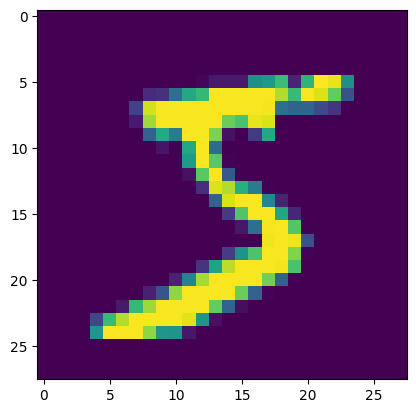

In [16]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(gambar_latih[0])
print(label_latih[0])

normalisasi manual, membagi setiap piksel sebesar 225

In [17]:
gambar_latih = gambar_latih / 255.0
gambar_testing = gambar_testing / 255.0

# Arsitektur model
### 3 layer
1. flatten untuk mengubah input dari array 2 dimensimenjadi array 1 dimensi 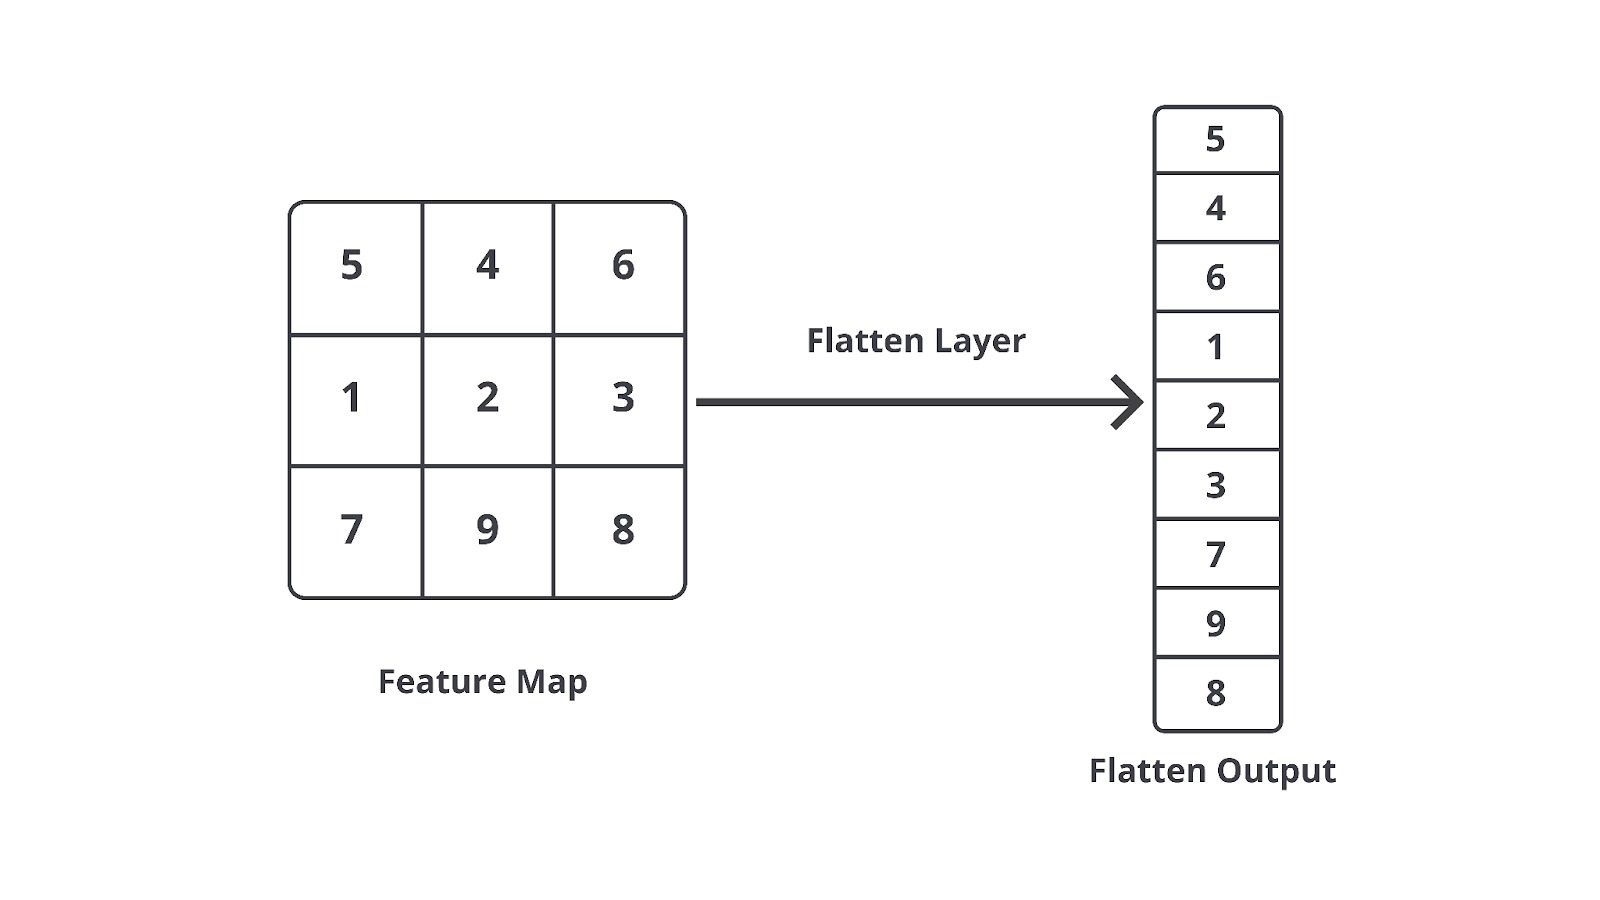

In [18]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

tentukan optimizer dan loss untuk model lalu lakukan pelatihan

In [19]:
model.compile(optimizer = tf.optimizers.Adam(),
       loss = 'sparse_categorical_crossentropy',
       metrics=['accuracy'])
model.fit(gambar_latih, label_latih, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9249 - loss: 0.2662
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9663 - loss: 0.1151
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9757 - loss: 0.0804
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9816 - loss: 0.0602
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9853 - loss: 0.0472


# Menggunakan model dari Tensorflow Datasets

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

daftar data di TFDS

In [22]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'ai2dcaption',
 'aloha_mobile',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asimov_dilemmas_auto_val',
 'asimov_dilemmas_scifi_train',
 'asimov_dilemmas_scifi_val',
 'asimov_injury_val',
 'asimov_multimodal_auto_val',
 'asimov_multimodal_manual_val',
 'asqa',
 'asset',
 'assin2',
 'asu_table_top_converted_externally_to_rlds',
 'austin_buds_dataset_converted_externally_to_rlds',
 'austin_sailor_dataset_converted_externally_to_rlds',
 'austin_sirius_dataset_converted_externally_to_rlds',
 'bair_robot_pushing_small',
 'bc_z',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'berkeley_autolab_ur5',
 'berkeley_cable_routing',
 'berkeley_fanuc_manipulation',
 'berkeley_gnm_cory_hall',
 'berkeley_gnm_recon',
 'berkeley_gnm_sac_son',
 'berkeley_mvp_converted_externally_to_rlds',
 'berkeley_rpt_converted_externally_to_rlds',
 'big_patent',
 'bigearthnet',
 'billsum',
 '

In [23]:
ds = tfds.load('mnist', split='train', shuffle_files=True)
assert isinstance(ds, tf.data.Dataset)

d:\PIJAK\DEEP LEARNING\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...:  50%|█████     | 2/4 [00:01<00:02,  1.11s/ url]

Dl Completed...:  75%|███████▌  | 3/4 [00:02<00:00,  1.08 url/s]

Dl Completed...: 100%|██████████| 4/4 [00:05<00:00,  1.08 url/s]

Dl Completed...: 100%|██████████| 4/4 [00:05<00:00,  1.46s/ url]


Dataset mnist downloaded and prepared to C:\Users\Thinkpad\tensorflow_datasets\mnist\3.0.1. Subsequent calls will reuse this data.


membagi dataset mernjadi data latih dan data uji

In [24]:
(train_images, train_labels), (test_images, test_labels) = tfds.as_numpy(tfds.load('mnist',
       split = ['train', 'test'],
       batch_size=-1,
       as_supervised=True))

# Arsitektur model
- **layer 1:** *Conv2D()* (mengekstraksi fitur dari gambar input menggunakan operasi konvolusi)
- **layer 2:** *MaxPooling2D* (mereduksi dimensi spasial dari representasi gambar berdasarkan layer sebelumnya)
- **layer berikutnya:** *Flatten* (untuk mengubah input kita yang berupa matriks 2 dimensi menjadi array 1 dimensi.)

In [25]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64,activation="relu"),
  tf.keras.layers.Dense(128,activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

d:\PIJAK\DEEP LEARNING\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


menentukan tiga buah argumen untuk melakukan compile model

In [26]:
model.compile(
  optimizer=tf.keras.optimizers.RMSprop(),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'],
)

# pelatihan

In [27]:
model.fit(train_images, train_labels, batch_size=50, epochs=5)

Epoch 1/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.9273 - loss: 0.2795
Epoch 2/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 24s 18ms/step - accuracy: 0.9756 - loss: 0.0866
Epoch 3/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9813 - loss: 0.0677
Epoch 4/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - accuracy: 0.9845 - loss: 0.0582
Epoch 5/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - accuracy: 0.9866 - loss: 0.0531


# evaluasi model

In [28]:
model.evaluate(test_images, test_labels, batch_size=1)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - accuracy: 0.9820 - loss: 0.0831


[0.08311338722705841, 0.9819999933242798]